# Analysis on Employee Attrition 

## The Problem: Employee Attrition

- Organizations face huge costs resulting from employee turnover.

- Some costs are tangible such as training expenses and the time it takes from when an employee starts to when they become a productive member. 

- However, the most important costs are intangible. 

- Consider what’s lost when a productive employee quits: new product ideas, great project management, or customer relationships. 

- In this project we will understand and identify the key variables that influence turnover.

We will be using some common Python libraries, such as pandas, numpy, seaborn, and matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns
# sns.set_style("white")
sns.set(font_scale=1.25)
plt.style.use('seaborn-v0_8-poster')
# %matplotlib inline
# %pylab inline

# Importing Dataset


We used the HR employee attrition data set that comes from the (https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) to carry out Exploratory Data Analysis. 

The dataset includes 1470 employees (rows) and 35 features (columns) a portion of which have left the organization (Attrition = “Yes”). Note that according to IBM, “this is a fictional data set created by IBM data scientists”.

To import the necessary data, we will use pandas' built in read_csv() function. 

In [3]:
# Reading the dataset
df_hr = pd.read_csv('IBM_HR_ATT_data.csv')
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print('Number of rows in the dataset: ',df_hr.shape[0])
print('Number of columns in the dataset: ',df_hr.shape[1])
print('So, this data set has : ',df_hr.shape[0],'rows of data with',df_hr.shape[1]-1,'features and 1 column of class information.')

Number of rows in the dataset:  1470
Number of columns in the dataset:  35
So, this data set has :  1470 rows of data with 34 features and 1 column of class information.


## Checking for null values from data.

In [5]:
count_missing = df_hr.isnull().sum()
percent_missing =  count_missing* 100 / df_hr.shape[0]
missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})

missing_value_df.style.background_gradient(cmap='plasma')

,count_missing,percent_missing
Age,0,0.000000
Attrition,0,0.000000
BusinessTravel,0,0.000000
DailyRate,0,0.000000
Department,0,0.000000
DistanceFromHome,0,0.000000
Education,0,0.000000
EducationField,0,0.000000
EmployeeCount,0,0.000000
EmployeeNumber,0,0.000000


## Checking for unique values from each column.

In [6]:
unique_df = pd.DataFrame([[df_hr[i].nunique(), df_hr[i].unique()]for i in df_hr.columns],
                         columns=['Count','unique'],
                         index=df_hr.columns
                        )

unique_df.style.background_gradient(cmap='plasma')

Quite interesting things have been revealed by the above exercise, the summary shows that the 3 vars, are all assuming same values and for the 3 variables,their std will be also = 0.

This indicates that these 3 variables (`EmployeeCount`, `Over18`, `StandardHours`) are of no use in this exercise and therefore we should eventually drop them. 

Besides, the column `EmployeeNumber` can be dropped as it shows just the identity of the employee.


Let's drop these columns.

In [7]:
df_hr.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)
df_hr.shape

(1470, 31)

Various features are defined below:

- **Education:** 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
- **EnvironmentSatisfaction:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- **JobInvolvement:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- **JobSatisfaction:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- **PerformanceRating:** 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
- **RelationshipSatisfaction:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- **WorkLifeBalance:** 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

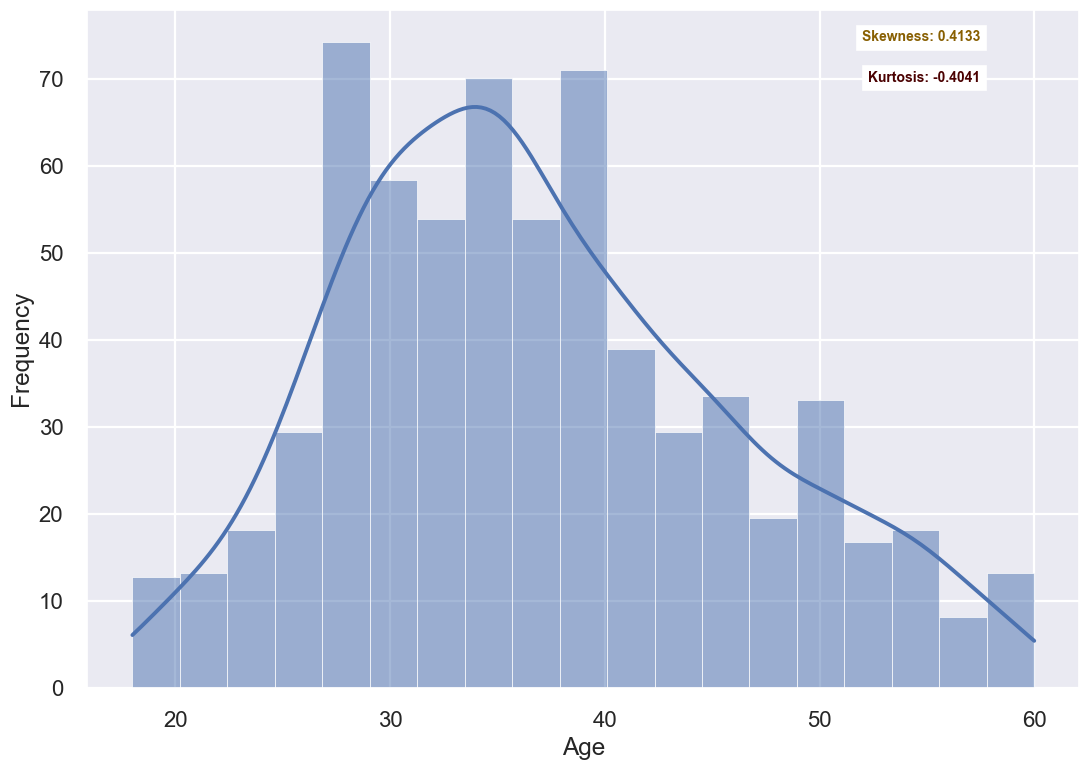

In [14]:
ax = sns.histplot(x="Age", data=df_hr, stat="frequency", kde=True)
ax.set_xlabel("Age");
ax.text(x=0.90, y=0.97, transform=ax.transAxes, s=f"Skewness: {df_hr.Age.skew():.4f}",
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')

ax.text(x=0.90, y=0.91,transform=ax.transAxes, s=f"Kurtosis: {df_hr.Age.kurt():.4f}",
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood');

- negative kurtosis values indicate a platykurtic (flatter) distribution, whereas positive values denote a leptokurtic (peaked) distribution. 
- Likewise, positive skewness values indicate the distribution shifted to the left, and the negative values denote a rightward shift.

**Skewness values exceeding $\pm 2.58$ are indicative of a non-normal distribution.**

## Partioning variables into numeric, categorial and nominal

In [9]:
# Code for converting above variables into categorial (ordinal scale)
cat0 = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
cat_edu = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
cat_performance = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
cat_workBalance = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}
cat_lst = [cat0, cat_edu, cat_performance, cat_workBalance]
col_transform = ['EnvironmentSatisfaction', 
                 'JobInvolvement', 
                 'JobSatisfaction', 
                 'RelationshipSatisfaction',
                 'Education',
                 'PerformanceRating',
                 'WorkLifeBalance'
                ]
def transform_ordinal(X, col_trans, dlst):
    df_new = X.copy()
    cnt = 1
    for ix, col in enumerate(col_trans):
        if ix < 4:
            df_new[col] = df_new[col].map(dlst[0])
            cat_type = pd.api.types.CategoricalDtype(categories=[v for v in dlst[0].values()], ordered=True)
            df_new[col] = df_new[col].astype(cat_type)
        else:
            df_new[col] = df_new[col].map(dlst[cnt])
            cat_type = pd.api.types.CategoricalDtype(categories=[v for v in dlst[cnt].values()], ordered=True)
            df_new[col] = df_new[col].astype(cat_type)
            cnt += 1
    return df_new

In [10]:
df_hr_new = transform_ordinal(df_hr, col_transform, cat_lst)
for col in col_transform:
    print('*'*40)
    print(df_hr_new[col].head(1))
    print('*'*40)

****************************************
0    Medium
Name: EnvironmentSatisfaction, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']
****************************************
****************************************
0    High
Name: JobInvolvement, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']
****************************************
****************************************
0    Very High
Name: JobSatisfaction, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']
****************************************
****************************************
0    Low
Name: RelationshipSatisfaction, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']
****************************************
****************************************
0    College
Name: Education, dtype: category
Categories (5, object): ['Below College' < 'College' < 'Bachelor' < 'Master' < 'Doctor']
**************

In [9]:
# Get information about the features
df_hr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   object  
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   object

In [11]:
# Get summary stats for the numeric variable
df_hr_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0


In [11]:
# Get summary stats for the nominal variable
df_hr_new.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [12]:
# Get summary stats for the ordinal variable
df_hr_new.describe(include=['category']).T

,count,unique,top,freq
Education,1470,5,Bachelor,572
EnvironmentSatisfaction,1470,4,High,453
JobInvolvement,1470,4,High,868
JobSatisfaction,1470,4,Very High,459
PerformanceRating,1470,2,Excellent,1244
RelationshipSatisfaction,1470,4,High,459
WorkLifeBalance,1470,4,Better,893


In [13]:
feature_by_dtype = {}
for c in df_hr_new.columns:
    
    if c == "Attrition": continue
    
    data_type = str(df_hr_new[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

feature_by_dtype
feature_by_dtype.keys()

dict_keys(['int64', 'object', 'category'])

In [14]:
nominal = feature_by_dtype["object"]
nominal

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [15]:
ordinal = feature_by_dtype["category"]
ordinal

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [16]:
numeric = feature_by_dtype["int64"]
numeric

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Exploratory data analysis

## About target variable, Attrition

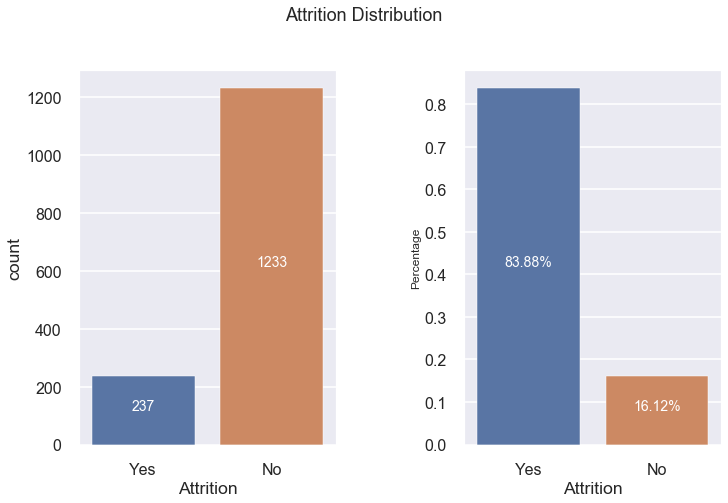

In [17]:
fig, (left, right) = plt.subplots(ncols=2, figsize=(12, 8))
sns.countplot(df_hr_new['Attrition'], ax=left)
sns.barplot(x = df_hr_new['Attrition'].unique(), 
            y = df_hr_new['Attrition'].value_counts(normalize=True, sort=False),
            ax=right)

for i in left.patches:
    left.text(i.get_x()+i.get_width()/2, i.get_height()/2, \
            str(round((i.get_height()), 2)), fontsize=14, 
             color='white',ha='center',rotation=0)

for i in right.patches:
    # get_x pulls left or right; get_height pushes up or down
    right.text(i.get_x()+i.get_width()/2, i.get_height()/2, \
            str(round((i.get_height()*100), 2))+'%', fontsize=14, color='white',
                ha='center',rotation=0)
    
right.set_ylabel("Percentage", fontsize=12)
plt.xlabel("Attrition")
plt.suptitle("Attrition Distribution", fontsize=18)
fig.tight_layout(pad=5)
plt.show()

In [18]:
rm = ['JobLevel','StockOptionLevel']
for ix in range(len(rm)):
    numeric.remove(rm[ix])
len(numeric)

14

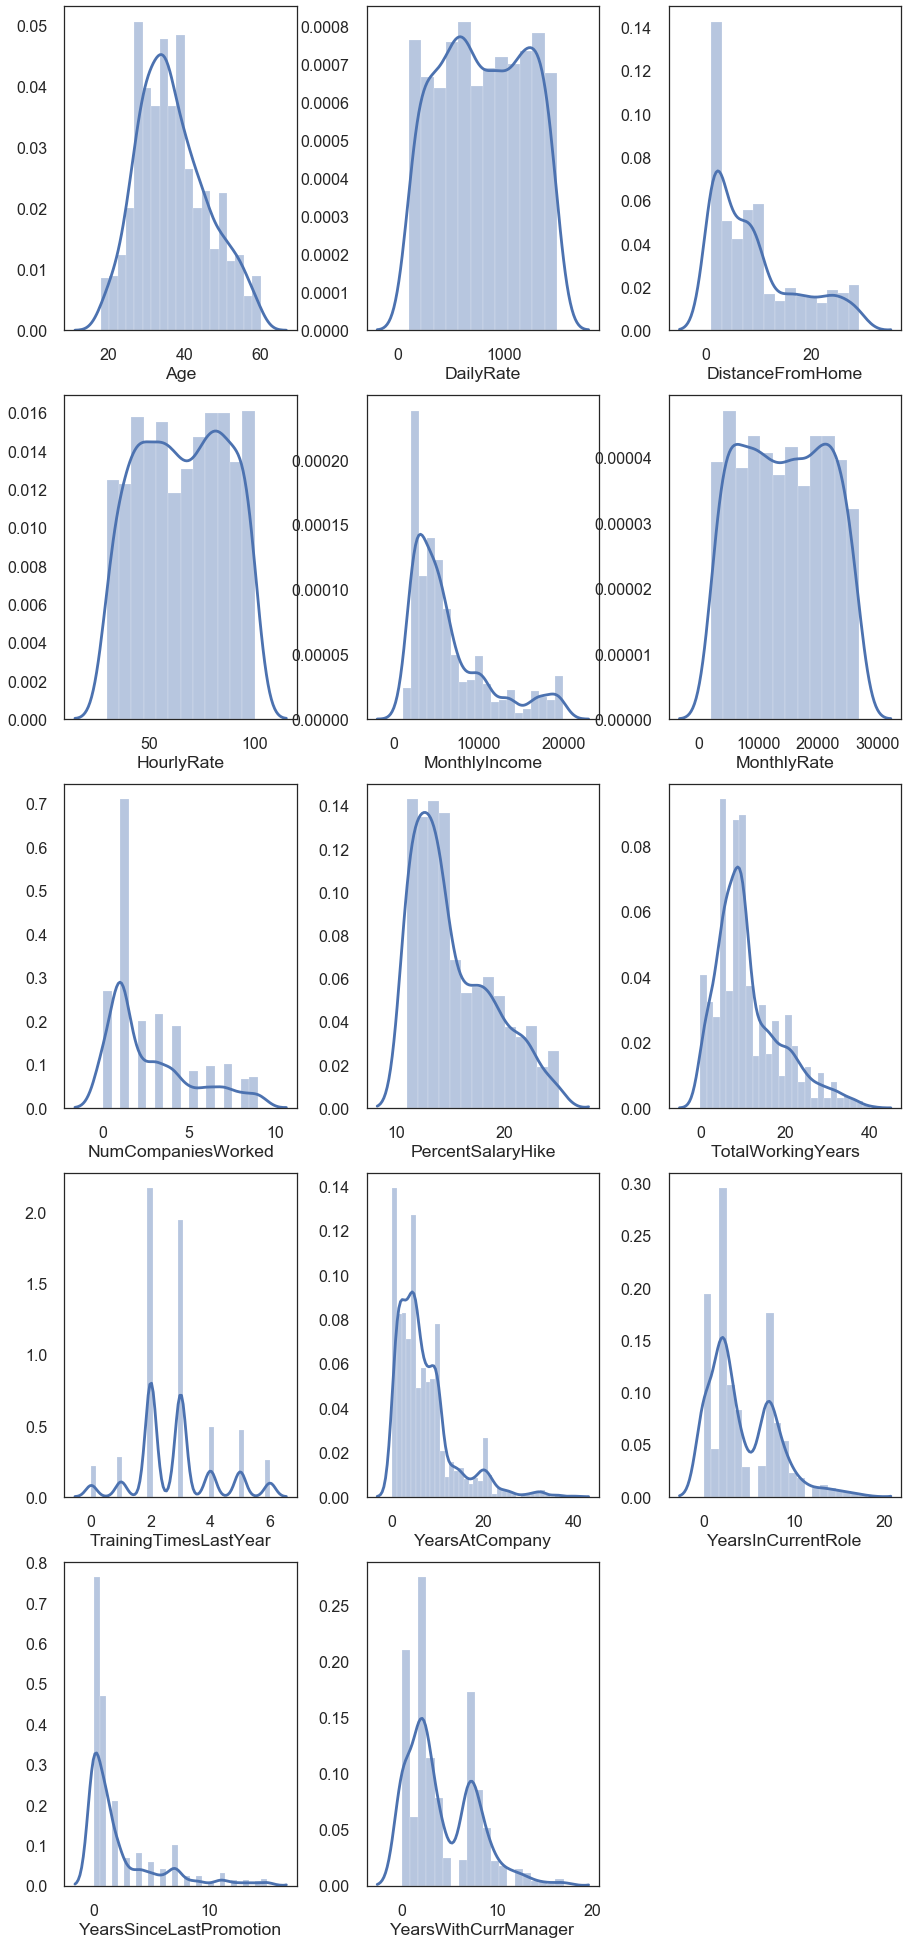

In [19]:
sns.set_style("white")
plt.figure(figsize=(15,9))
j=0
for i in numeric:
    j +=1
    plt.subplot(5,3,j)
    sns.distplot(df_hr_new[i])
# Custom the subplot layout
# plt.tight_layout(pad=0.8)
plt.subplots_adjust(bottom=-0.9, top=2, wspace = 0.30)
plt.show()

### we can observe followings from above plots:

1. Max 30-40 age people are there,
2. Lots of people are lives close to the office,
3. Max poeple getting average salary between 0 - 5000 dollers, and might be only those are on higher post they are getting higher salary.
4. 0-15 percent salary hike is normal among the people,
5. Many employees are recently promoted, 
6. Max exmployees are less than 10 years at company. 

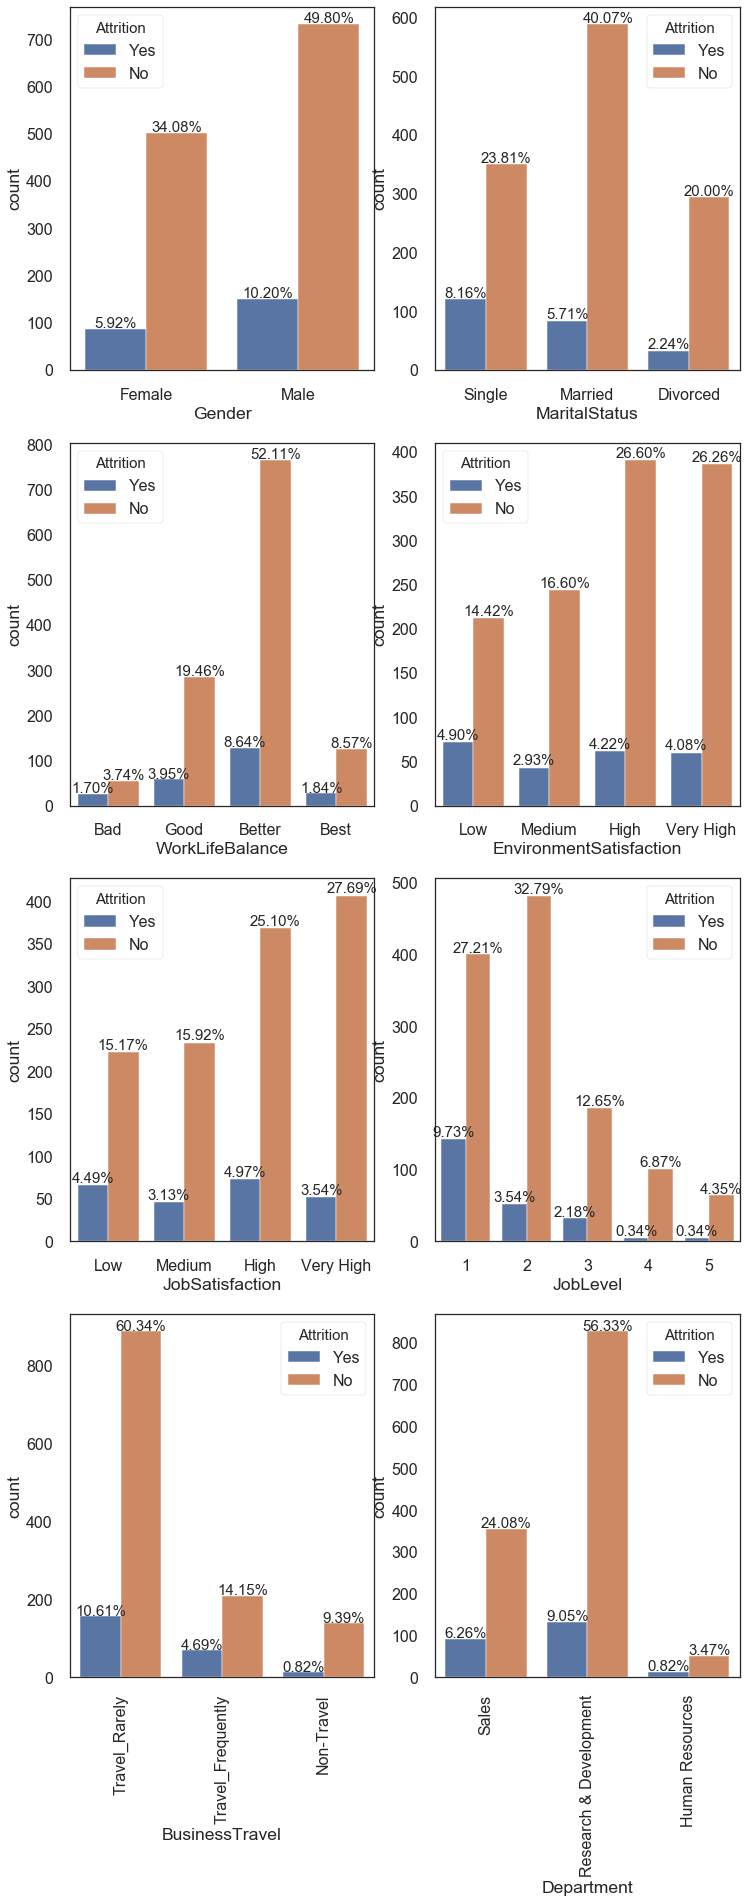

In [20]:
# sns.set_style("white")
total_records= df_hr_new.shape[0]
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df_hr_new,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_records*100,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

**Observation from above Count Plot Graph**

1. Single attrition rate is 50% in marital status.

2. Job Level -1 attrition rate is also high comapre to other job levels

3. EnvironmentSatisfaction Level 1 has high attrition rate.

4. Attrition rates are high in these attribute R&D Deparment, Male,Jobsatisfaction High

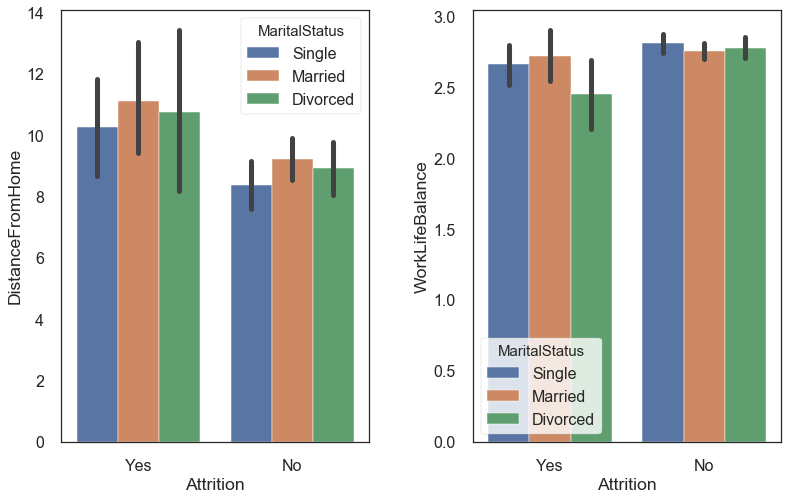

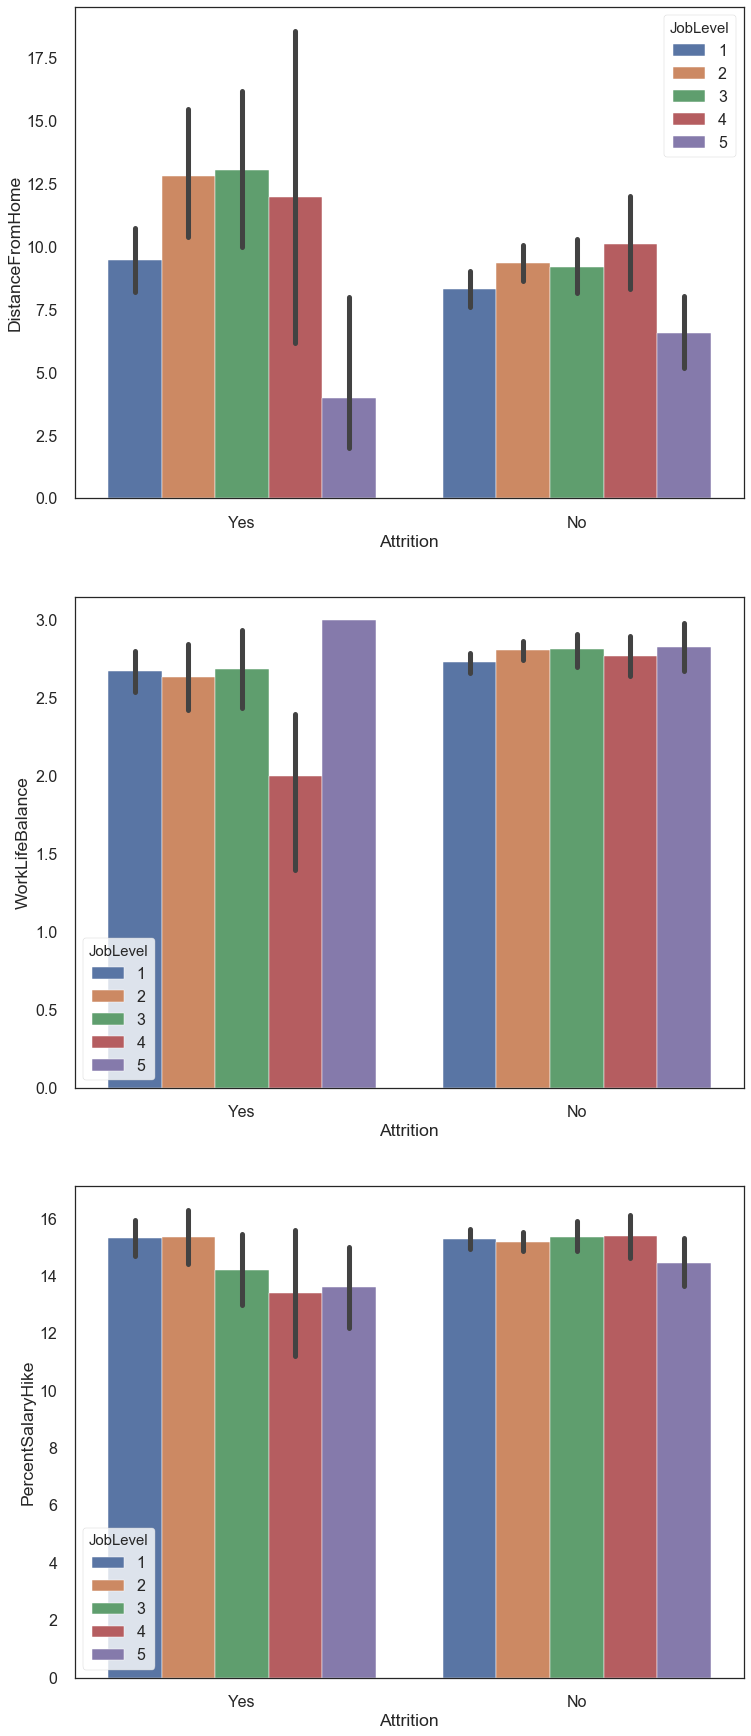

In [21]:
# MaritalStatus wise
columns = ["DistanceFromHome", "WorkLifeBalance"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = df_hr[i], hue="MaritalStatus", data=df_hr)

plt.tight_layout(pad=3)

plt.show()

#JobLevel wise
columns = ["DistanceFromHome",
"WorkLifeBalance",
"PercentSalaryHike"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(3,1,j)
    sns.barplot(x = 'Attrition', y = df_hr[i], hue="JobLevel", data=df_hr)

plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

Employee are more likely to quit , When

1. `DistanceFromHome` is above 8KM and (`Married` people are higher in this case )

2. `DistanceFromHome` is above 2.5 for `JobLevel` 5

f:\python\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


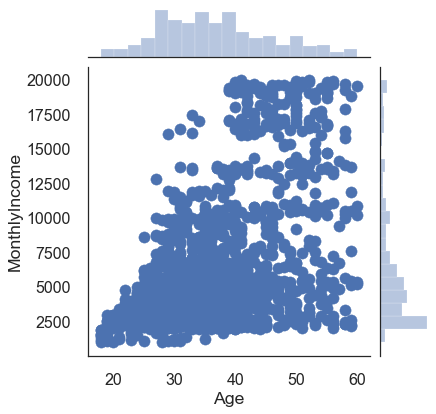

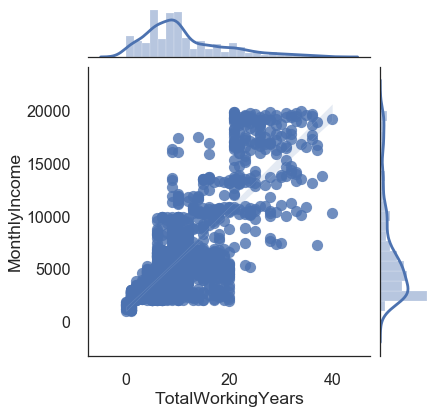

In [22]:
# ## Joint scatter plot
sns.jointplot(df_hr_new.Age,df_hr_new.MonthlyIncome, kind = "scatter")   
# plt.show()

#Joint scatter plot with least square line
sns.jointplot(df_hr_new.TotalWorkingYears,df_hr_new.MonthlyIncome, kind = "reg")   
plt.show()


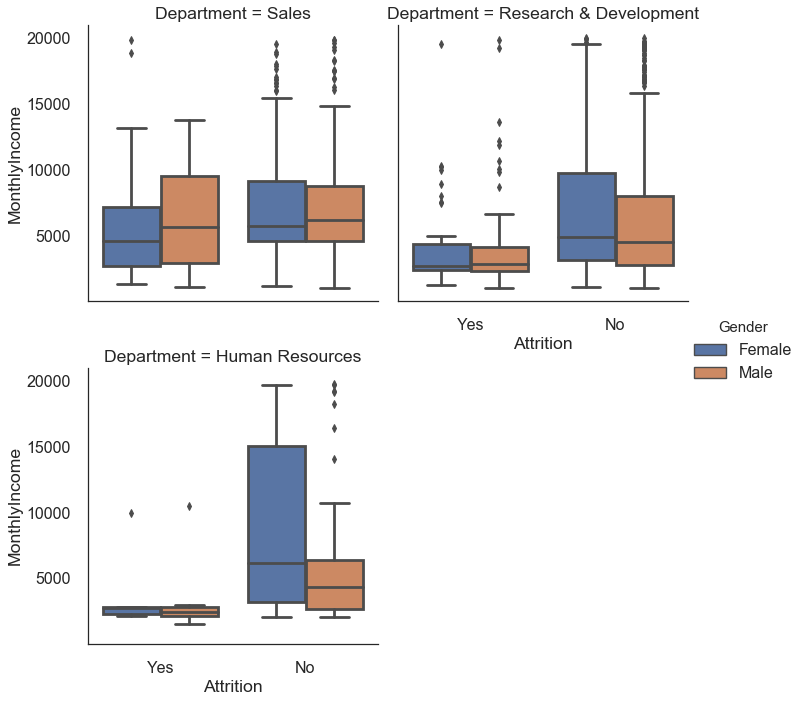

In [23]:
sns.catplot(x =   'Attrition',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'Gender',    # Categorical
               col = 'Department',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = df_hr_new)
plt.show()

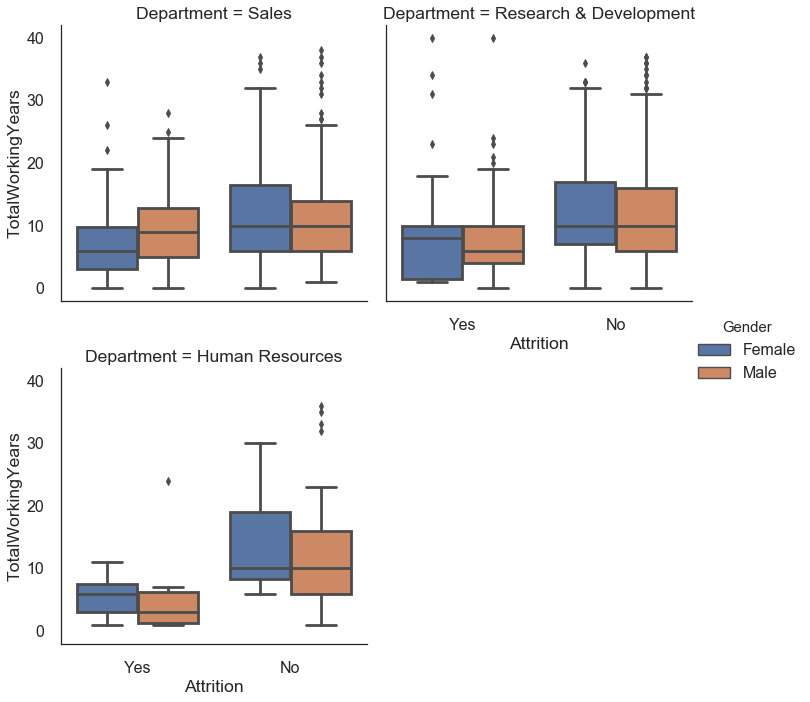

In [24]:
sns.catplot(x =   'Attrition',     # Categorical
               y =   'TotalWorkingYears',      # Continuous
               hue = 'Gender',    # Categorical
               col = 'Department',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = df_hr_new)
plt.show()

## Correlation

In [25]:
numeric.append('Attrition')
# Compute the correlation matrix with numerical features
df_hr_numeric = df_hr_new[numeric].copy()
# df_hr_numeric.head()
df_hr_numeric['Attrition'] = df_hr_numeric['Attrition'].replace({'Yes':1,'No':0})
corr = df_hr_numeric[numeric].corr()
corr

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.024287,0.497855,0.028051,0.299635,0.003634,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.007707,-0.032182,0.038153,0.022704,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406,0.077924
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.015794,-0.015297,0.022157,-0.009062,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079,-0.159840
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.034814,1.000000,0.017521,-0.006429,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746,0.015170
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.149515,0.017521,1.000000,-0.010238,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319,0.043494
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985,-0.013478
TotalWorkingYears,0.680381,0.014515,0.004628,-0.002334,0.772893,0.026442,0.237639,-0.020608,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188,-0.171063
TrainingTimesLastYear,-0.019621,0.002453,-0.036942,-0.008548,-0.021736,0.001467,-0.066054,-0.005221,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096,-0.059478


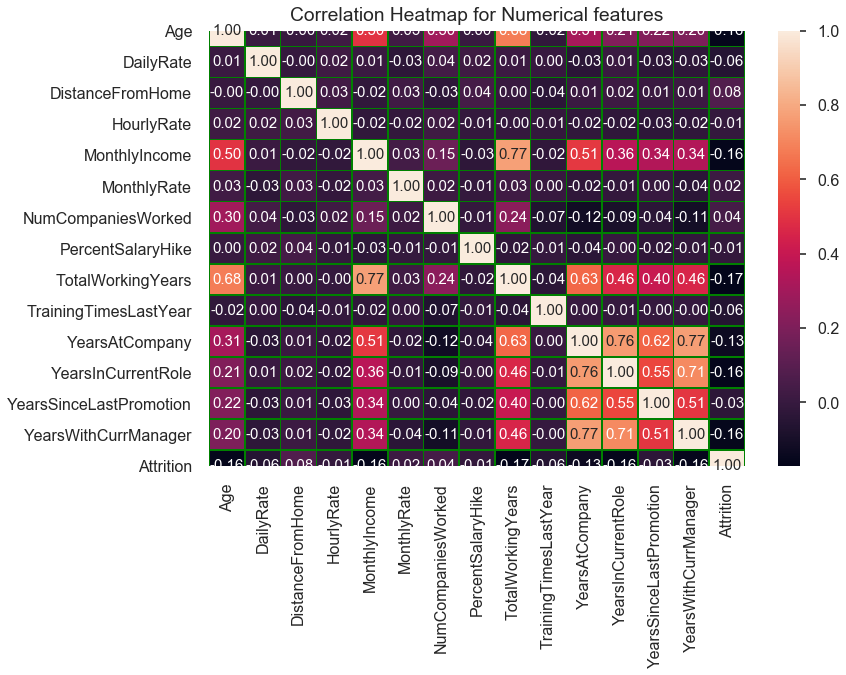

In [26]:
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(df_hr_numeric.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".2f",ax=ax)
plt.title("Correlation Heatmap for Numerical features", pad=10)
plt.show()

In [27]:
# just correlations between every feature and the response
corr['Attrition'].sort_values(ascending=False).to_frame().style.background_gradient(cmap='plasma')

,Attrition
Attrition,1.000000
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyRate,0.015170
HourlyRate,-0.006846
PercentSalaryHike,-0.013478
YearsSinceLastPromotion,-0.033019
DailyRate,-0.056652
TrainingTimesLastYear,-0.059478
YearsAtCompany,-0.134392


f:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


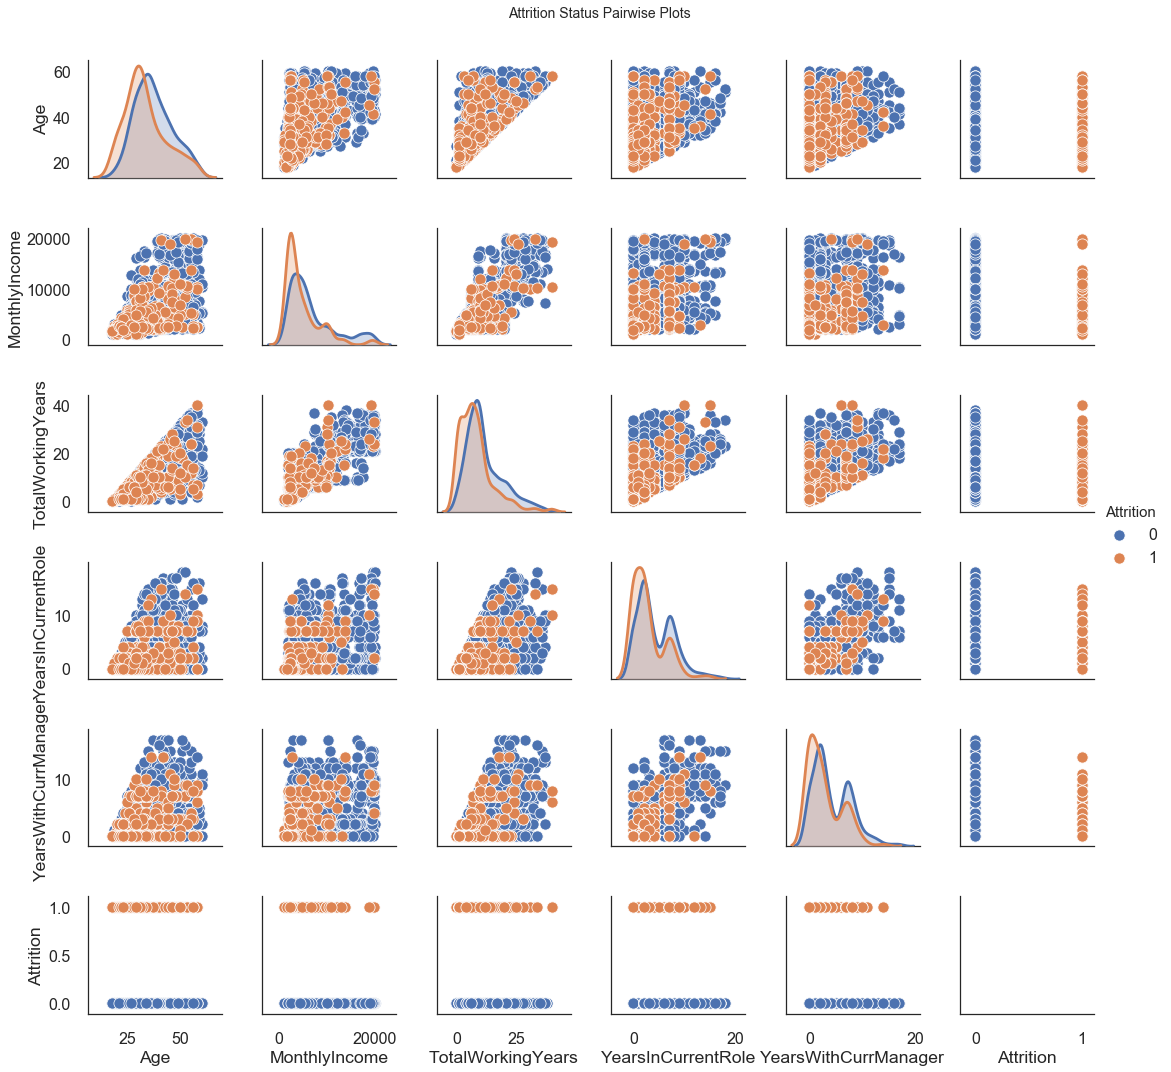

In [28]:
# filter only correlations stronger than .15 in either direction (positive or negative)
# store the features
highly_correlated_numerical_features = df_hr_numeric.columns[corr['Attrition'].abs() > .15]
cols = highly_correlated_numerical_features
# df_hr_numeric['Attrition'] = df_hr_numeric['Attrition'].map({1: 'Yes', 0: 'No'})
pp = sns.pairplot(df_hr_numeric, vars=cols, hue='Attrition' )
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attrition Status Pairwise Plots', fontsize=14)

In [29]:
ordinal.append('Attrition')

In [30]:
# Compute the correlation matrix with ordinal features
df_hr_ordinal = df_hr[ordinal].copy()
df_hr_ordinal['Attrition'] = df_hr_ordinal['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
corr = df_hr_ordinal.corr(method='spearman')
corr

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition
Education,1.000000,-0.027625,0.037231,-0.005175,-0.025081,-0.013173,0.017350,-0.030346
EnvironmentSatisfaction,-0.027625,1.000000,-0.015301,-0.002993,-0.029160,0.005353,0.027169,-0.096486
JobInvolvement,0.037231,-0.015301,1.000000,-0.012148,-0.024733,0.037857,-0.019889,-0.119496
JobSatisfaction,-0.005175,-0.002993,-0.012148,1.000000,0.006979,-0.014679,-0.029781,-0.102948
PerformanceRating,-0.025081,-0.029160,-0.024733,0.006979,1.000000,-0.032989,0.006808,0.002889
RelationshipSatisfaction,-0.013173,0.005353,0.037857,-0.014679,-0.032989,1.000000,0.017684,-0.042664
WorkLifeBalance,0.017350,0.027169,-0.019889,-0.029781,0.006808,0.017684,1.000000,-0.051951
Attrition,-0.030346,-0.096486,-0.119496,-0.102948,0.002889,-0.042664,-0.051951,1.000000


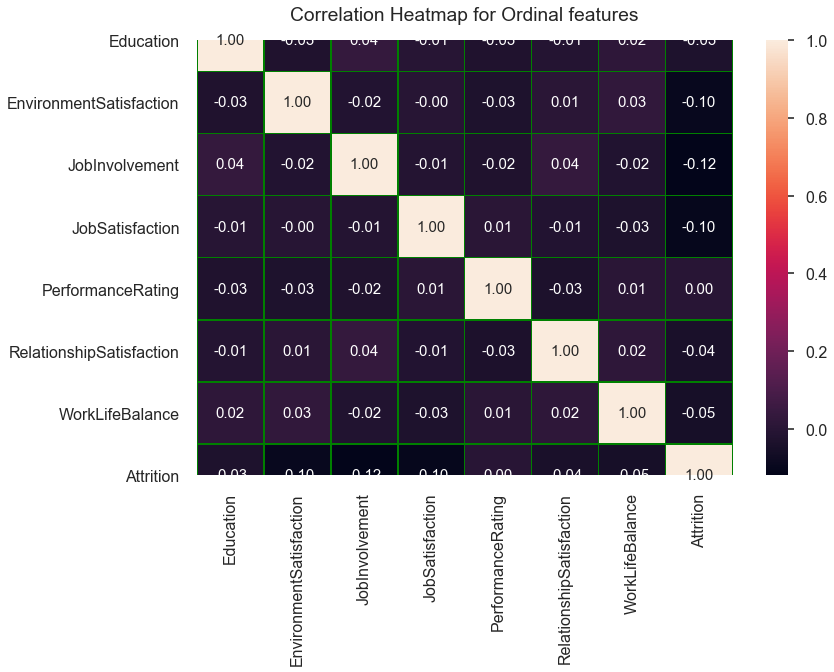

In [31]:
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor="green",fmt=".2f",ax=ax)
plt.title("Correlation Heatmap for Ordinal features", pad=20)
plt.show()

In [32]:
highly_correlated_ordinal_features = df_hr_ordinal.columns[corr['Attrition'].abs() > .09]


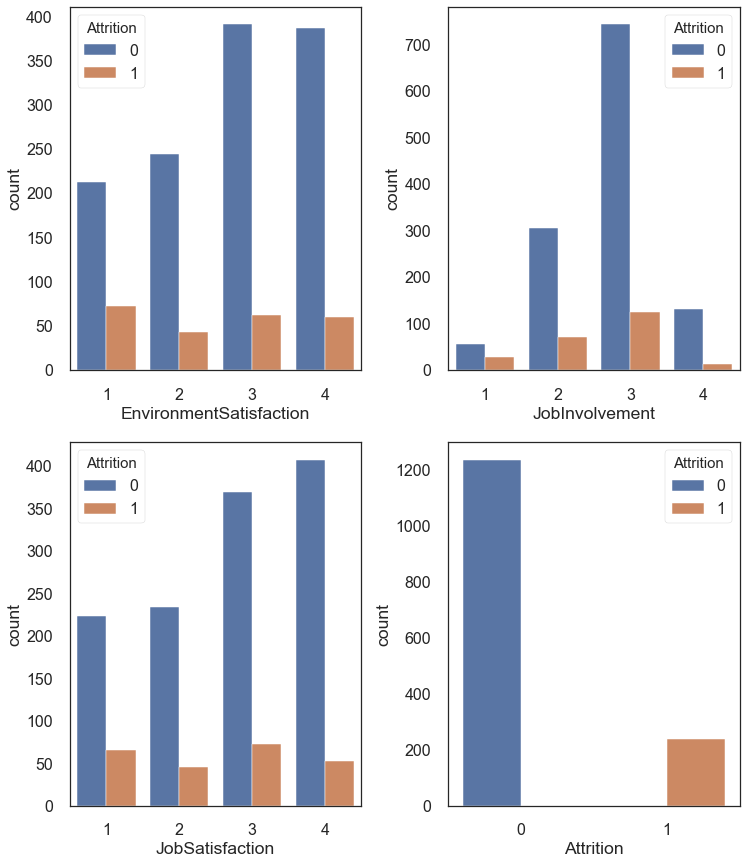

In [33]:
cols = highly_correlated_ordinal_features
df_hr_o = df_hr[cols].copy()
df_hr_o['Attrition'] = df_hr_o['Attrition'].map({'Yes': 1, 'No': 0})
total_records= len(df_hr_o)
plt.figure(figsize=(12,8))
j=0
for i in cols:
    j +=1
    plt.subplot(4,2,j)
    ax1 = sns.countplot(data=df_hr_o,x= i,hue="Attrition")

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, wspace=0.3)
plt.show()

In [15]:
# Function to calculate correlation coefficient between two arrays
def cust_corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 3))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.4), size = 20, xycoords = ax.transAxes)

In [17]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


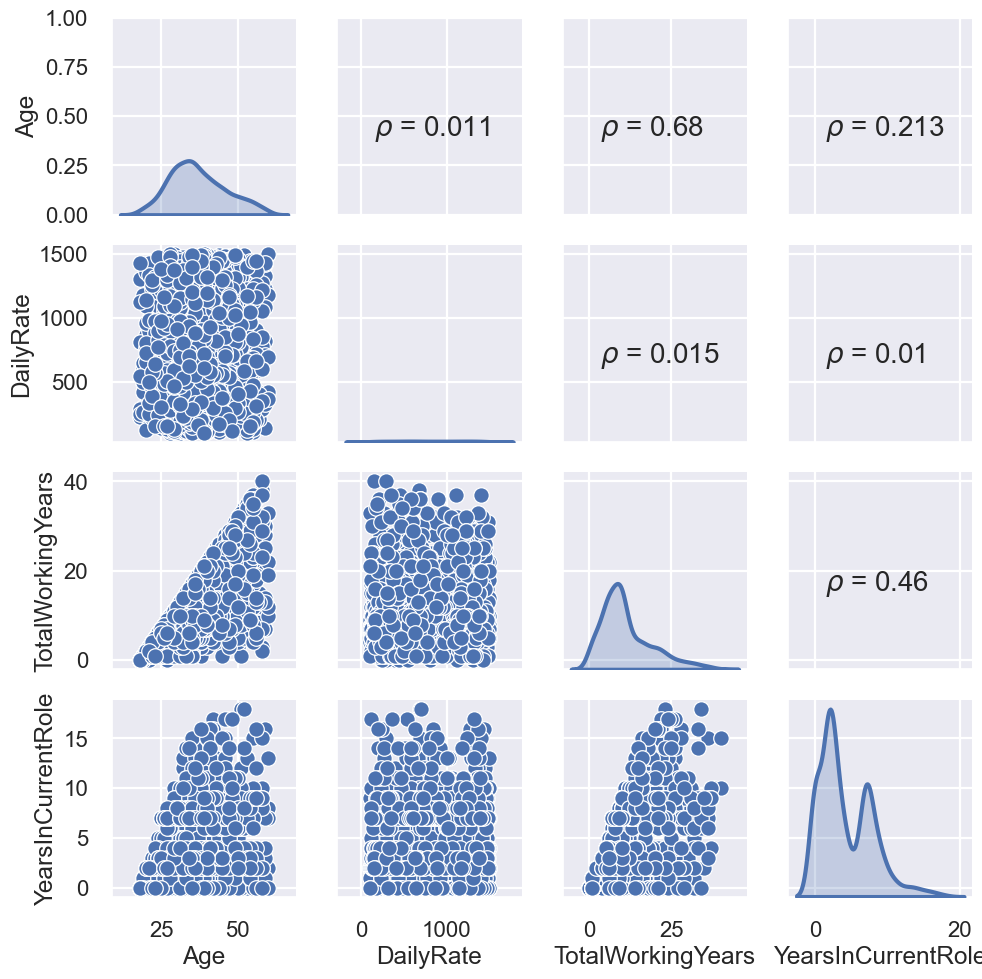

In [20]:
g = sns.PairGrid(data = df_hr, vars=['Age','DailyRate','TotalWorkingYears','YearsInCurrentRole'])
g.map_upper(cust_corr)
g.map_lower(sns.scatterplot)
# g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False, fill=True);